In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import string # special operations on strings
import spacy # language models

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

In [4]:
df = pd.read_csv("E://EXCELR//PARTH SIR//inclass excercises//datasets//text mining//Samsung M32 Reviews.csv",encoding="latin1")


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  40 non-null     int64 
 1   Review      40 non-null     object
dtypes: int64(1), object(1)
memory usage: 768.0+ bytes


In [6]:
dfnew=df.drop(columns=['Unnamed: 0'])

In [7]:
dfnew

,Review
0,Backwash phone no good phone cheap pro. Medi...
1,Good 5G phone
2,I sold the phone sameday somehow on olx in 4...
3,"Phone look is nice,Battery drain 65% after n..."
4,Dislike- camera
5,Good phone till now except the finger print ...
6,"The quality of camera, screen and performanc..."
7,Cons:1. Charger Adapter is only 15W Fast Cha...
8,I bought the phone with expectations of high...
9,Camera quality is too poor build quality is ...


In [8]:
import re #regular expression
import string

def clean_text(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub("[0-9" "]+"," ",text)
    text = re.sub('[‘’“”…]', '', text)
    return text

clean = lambda x: clean_text(x)

In [9]:
cleaned_df = df.Review.apply(clean)
cleaned_df

0       backwash phone no good phone cheap pro media...
1                                           good  phone
2       i sold the phone sameday somehow on olx in  ...
3       phone look is nicebattery drain  after norma...
4                                        dislike camera
5       good phone till now except the finger print ...
6       the quality of camera screen and performance...
7        charger adapter is only  fast charging unit...
8       i bought the phone with expectations of high...
9       camera quality is too poor build quality is ...
10              box seal damageeveryone please be aware
11      phone features are ok but samsung should con...
12      i bought samsung  mobile last weekit its mob...
13      samsung   is a rubbish mobile from samsung a...
14      i have multiple feedback or this model overa...
15      gorgeous blue glass body quick charge good s...
16      i have brought this phone during the first d...
17      dear friends kindly dont buy this mobile

In [10]:
#Word frequency
freq = pd.Series(' '.join(cleaned_df).split()).value_counts()[:20] # for top 20
freq

is         78
phone      54
i          48
the        47
this       46
not        38
and        36
to         35
of         34
a          34
in         29
for        27
but        21
mobile     21
with       20
it         20
samsung    20
very       18
dont       17
are        16
dtype: int64

In [11]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
cleaned_df = cleaned_df.apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [12]:
#word frequency after removal of stopwords
freq_Sw = pd.Series(' '.join(cleaned_df).split()).value_counts()[:20] # for top 20
freq_Sw

phone      54
mobile     21
samsung    20
dont       17
good       16
amazon     14
screen     13
product    12
like       12
camera     10
even       10
buy        10
price       8
display     8
day         7
getting     7
worst       6
clear       6
charger     6
battery     6
dtype: int64

In [13]:
# count vectoriser tells the frequency of a word.
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
vectorizer = CountVectorizer(min_df = 1, max_df = 0.9)
X = vectorizer.fit_transform(cleaned_df)
word_freq_df = pd.DataFrame({'term': vectorizer.get_feature_names(), 'occurrences':np.asarray(X.sum(axis=0)).ravel().tolist()})
word_freq_df['frequency'] = word_freq_df['occurrences']/np.sum(word_freq_df['occurrences'])

In [14]:
word_freq_df.head(30)

,term,occurrences,frequency
0,able,3,0.002580
1,accept,1,0.000860
2,accepting,1,0.000860
3,accidentally,1,0.000860
4,according,1,0.000860
5,adapter,2,0.001720
6,adding,1,0.000860
7,additional,1,0.000860
8,adjust,1,0.000860
9,adult,1,0.000860


In [15]:
#TFIDF - Term frequency inverse Document Frequencyt
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features= 1000, max_df = 0.5, smooth_idf=True) #keep top 1000 words
doc_vec = vectorizer.fit_transform(cleaned_df)
names_features = vectorizer.get_feature_names()
dense = doc_vec.todense()
denselist = dense.tolist()
df = pd.DataFrame(denselist, columns = names_features)

In [16]:
df

,able,accept,accepting,accidentally,according,adapter,adding,additional,adjust,adult,...,worsening,worst,worstfront,worstif,worth,worthy,year,yesterday,yrs,zero
0,0.000000,0.000000,0.0000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.0000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.0000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.0000,0.120875,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.166324,0.000000
3,0.000000,0.000000,0.0000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.0000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.274071,0.000000,0.0000,0.152406,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.1575,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.1575,0.114462,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.0000,0.000000,0.00000,0.10620,0.000000,0.000000,0.000000,0.000000,...,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.100685,0.000000,0.0000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.0000,0.081379,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.0000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [17]:
#Bi-gram
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  #for tri-gram, put ngram_range=(3,3)
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

In [18]:
top2_words = get_top_n2_words(cleaned_df, n=200) #top 200
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
top2_df.head()

,Bi-gram,Freq
0,dont buy,6
1,phone good,4
2,finger print,4
3,good phone,3
4,like phone,3


[Text(0, 0, 'dont buy'),
 Text(1, 0, 'phone good'),
 Text(2, 0, 'finger print'),
 Text(3, 0, 'good phone'),
 Text(4, 0, 'like phone'),
 Text(5, 0, 'waste money'),
 Text(6, 0, 'dont know'),
 Text(7, 0, 'buy product'),
 Text(8, 0, 'price range'),
 Text(9, 0, 'tft like'),
 Text(10, 0, 'performance phone'),
 Text(11, 0, 'able hear'),
 Text(12, 0, 'voice clear'),
 Text(13, 0, 'quality poor'),
 Text(14, 0, 'return policy'),
 Text(15, 0, 'fast charging'),
 Text(16, 0, 'charger wire'),
 Text(17, 0, 'bought phone'),
 Text(18, 0, 'phone starting'),
 Text(19, 0, 'amoled display')]

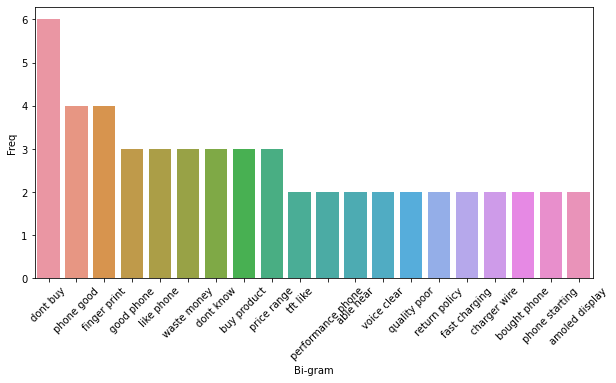

In [19]:
#Bi-gram plot
import matplotlib.pyplot as plt
import seaborn as sns
top20_bigram = top2_df.iloc[0:20,:]
fig = plt.figure(figsize = (10, 5))
plot=sns.barplot(x=top20_bigram["Bi-gram"],y=top20_bigram["Freq"])
plot.set_xticklabels(rotation=45,labels = top20_bigram["Bi-gram"])

In [20]:
#Tri-gram
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), 
           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]


In [21]:
top3_words = get_top_n3_words(cleaned_df, n=200)
top3_df = pd.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Freq"]

In [22]:
top3_df

,Tri-gram,Freq
0,dont buy product,2
1,backwash phone good,1
2,phone good phone,1
3,good phone cheap,1
4,phone cheap pro,1
...,...,...
195,length less feet,1
196,less feet comparatively,1
197,feet comparatively less,1
198,comparatively less normal,1


[Text(0, 0, 'dont buy product'),
 Text(1, 0, 'backwash phone good'),
 Text(2, 0, 'phone good phone'),
 Text(3, 0, 'good phone cheap'),
 Text(4, 0, 'phone cheap pro'),
 Text(5, 0, 'cheap pro mediatek'),
 Text(6, 0, 'pro mediatek screen'),
 Text(7, 0, 'mediatek screen tft'),
 Text(8, 0, 'screen tft battery'),
 Text(9, 0, 'tft battery charger'),
 Text(10, 0, 'battery charger slow'),
 Text(11, 0, 'charger slow watt'),
 Text(12, 0, 'slow watt like'),
 Text(13, 0, 'watt like phone'),
 Text(14, 0, 'like phone nothing'),
 Text(15, 0, 'phone nothing goodsamsung'),
 Text(16, 0, 'nothing goodsamsung poor'),
 Text(17, 0, 'goodsamsung poor phone'),
 Text(18, 0, 'poor phone dont'),
 Text(19, 0, 'phone dont buy')]

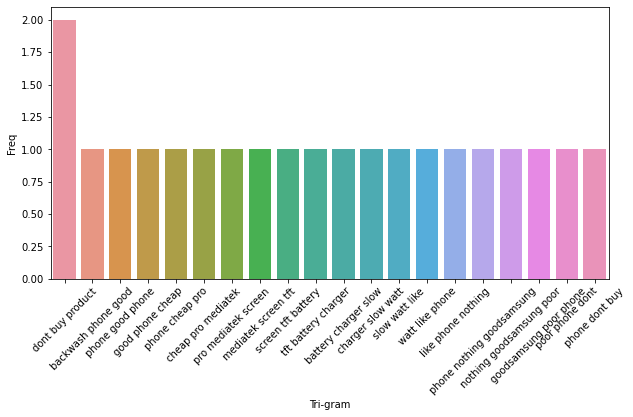

In [23]:
top20_trigram = top3_df.iloc[0:20,:]
fig = plt.figure(figsize = (10, 5))
plot=sns.barplot(x=top20_trigram["Tri-gram"],y=top20_trigram["Freq"])
plot.set_xticklabels(rotation=45,labels = top20_trigram["Tri-gram"])

In [24]:
string_Total = " ".join(cleaned_df)

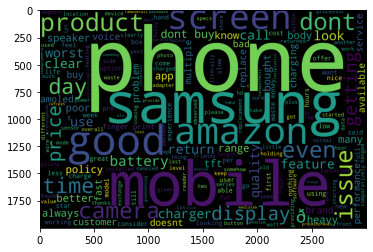

In [25]:
#wordcloud for entire corpus
from wordcloud import WordCloud
wordcloud_stw = WordCloud(
                background_color= 'black',
                width = 3000,
                height = 2000
                ).generate(string_Total)
plt.imshow(wordcloud_stw)

In [26]:
# Parts Of Speech (POS) Tagging
nlp=spacy.load('en_core_web_sm')

one_block=string_Total
doc_block=nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [27]:
for token in doc_block[100:200]:
    print(token,token.pos_)    

camera NOUN
good ADJ
phone NOUN
till SCONJ
except SCONJ
finger NOUN
print NOUN
button NOUN
location NOUN
accidentally ADV
pressed VERB
always ADV
holding VERB
phoneupdate NOUN
reducing VERB
starfacing VERB
glitches NOUN
able ADJ
hear VERB
call NOUN
body NOUN
first ADV
keep VERB
try VERB
time NOUN
hearif ADV
connect VERB
first ADJ
voice NOUN
clear ADV
never ADV
faced VERB
earlier ADJ
realme NOUN
phcharging VERB
time NOUN
taking VERB
hell NOUN
lot NOUN
timeupdate VERB
pls INTJ
do AUX
nt PART
phone NOUN
speaker NOUN
clear ADJ
call NOUN
giving VERB
disturbance NOUN
able ADJ
hear VERB
voice NOUN
clearly ADV
quality ADJ
camera NOUN
screen NOUN
performance NOUN
goodcamera NOUN
quality NOUN
poor ADJ
even ADV
capturing VERB
photo NOUN
like ADP
phone NOUN
cost NOUN
return NOUN
policy NOUN
amazon NOUN
worst ADJ
proper ADJ
response NOUN
executives NOUN
amazon NOUN
accepting VERB
return NOUN
product NOUN
do AUX
nt PART
know VERB
reason NOUN
behind ADV
do AUX
nt PART
enecouranging VERB
sale NOUN
pro

In [28]:
# Filtering the nouns and verbs only
nouns_verbs=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[100:200])

['performance', 'goodcamera', 'quality', 'capturing', 'photo', 'phone', 'cost', 'return', 'policy', 'amazon', 'response', 'executives', 'amazon', 'accepting', 'return', 'product', 'know', 'reason', 'enecouranging', 'sale', 'product', 'getting', 'problem', 'form', 'customers', 'belief', 'amazon', 'worsening', 'day', 'day', 'disopinted', 'amazon', 'charger', 'adapter', 'charging', 'unit', 'takes', 'hours', 'get', 'charger', 'wire', 'length', 'feet', 'length', 'charger', 'wire', 'charged', 'phone', 'stand', 'day', 'use', 'phone', 'level', 'use', 'internet', 'calls', 'use', 'folder', 'option', 'securing', 'infoapps', 'data', 'hand', 'phone', 'body', 'using', 'finger', 'print', 'pin', 'pattern', 'phone', 'got', 'phone', 'ram', 'installed', 'apps', 'used', 'phone', 'show', 'finger', 'print', 'sensor', 'side', 'switch', 'onoff', 'button', 'seems', 'bought', 'phone', 'expectations', 'end', 'performance', 'phone', 'priced', 'started', 'line', 'issue', 'left', 'side', 'screen']


In [29]:
# Counting the noun & verb tokens
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

X=cv.fit_transform(nouns_verbs)
sum_words=X.sum(axis=0)

words_freq=[(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq=sorted(words_freq, key=lambda x: x[1], reverse=True)

wd_df=pd.DataFrame(words_freq)
wd_df.columns=['word','count']
wd_df[0:10] # viewing top ten results

,word,count
0,phone,53
1,screen,13
2,amazon,12
3,product,11
4,buy,10
5,camera,10
6,display,8
7,price,8
8,day,7
9,charger,6


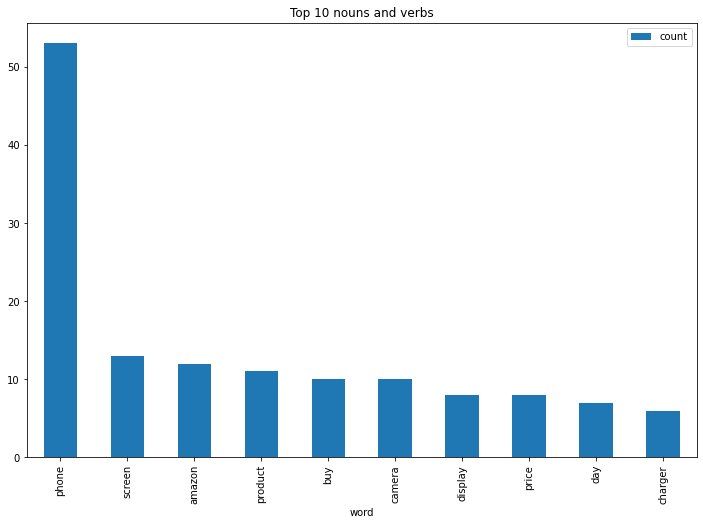

In [30]:
# Visualizing results (Barchart for top 10 nouns + verbs)
wd_df[0:10].plot.bar(x='word',figsize=(12,8),title='Top 10 nouns and verbs');

In [59]:
from nltk import tokenize
sentences=tokenize.sent_tokenize(' '.join(dfnew.Review))
sentences

['  Backwash phone no good phone cheap pro.',
 "Mediatek 720 screen TFT and battery charger  slow 15 watt only like 10000 phone ..nothing good..samsung very poor phone ..don't buy in 20000 ...TFT like 5000 phone display   Good 5G phone   I sold the phone sameday somehow on olx in 4k loss.",
 'Amazon doesnâ\x80\x99t provide return.Phone is a joke.Plain M32 had full hd screen and now with 5G price has gone up by 6k and display is surprisingly half hd(HD+) .',
 'This is plain loot.Plastic is cheap.Camera is worst than any 10k phnSlow processorEven screen lags in scrolling, such bad refresh ratePathetic Processor and ramOverall its from 2012 times where HD+ was a thing.',
 'This phone is 9 yrs late.Never buy samsung in this segment.',
 "Phone look is nice,Battery drain 65% after normal use 4 hours and 15 min.Camera is not as 48 mp if I compare my vivo phone 13 Mp is better than thisIf I talk about all over performance so phone is only good looking else nothing is in this device is goodPlz 

In [60]:
sent_df=pd.DataFrame(sentences,columns=['sentence'])
sent_df

,sentence
0,Backwash phone no good phone cheap pro.
1,Mediatek 720 screen TFT and battery charger s...
2,Amazon doesnât provide return.Phone is a jok...
3,This is plain loot.Plastic is cheap.Camera is ...
4,This phone is 9 yrs late.Never buy samsung in ...
...,...
91,"Now I can't believe, new phone getting hanged ..."
92,Old Samsung patent of getting hanged continues.
93,Ready to capture pic then touch not responding...
94,This issue observed my my relative also... For...


In [61]:
# Emotion Lexicon - Affin
affin=pd.read_csv('E:\\EXCELR\\PARTH SIR\\inclass excercises\\datasets\\Afinn.csv',sep=',',encoding='Latin-1')
affin

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [62]:
affinity_scores=affin.set_index('word')['value'].to_dict()
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [63]:
# Custom function: score each word in a sentence in lemmatised form, but calculate the score for the whole original sentence
nlp=spacy.load('en_core_web_sm')
sentiment_lexicon=affinity_scores

def calculate_sentiment(text:str=None):
    sent_score=0
    if text:
        sentence=nlp(text)
        for word in sentence:
            sent_score+=sentiment_lexicon.get(word.lemma_,0)
    return sent_score

In [64]:
# manual testing
calculate_sentiment(text='great')

3

In [65]:
sent_df['sentiment_value']=sent_df['sentence'].apply(calculate_sentiment)
sent_df['sentiment_value']

0     2
1     5
2     2
3    -7
4     0
     ..
91    0
92    0
93   -1
94    0
95    3
Name: sentiment_value, Length: 96, dtype: int64

In [66]:
# how many words are there in a sentence?
sent_df['word_count']=sent_df['sentence'].str.split().apply(len)
sent_df['word_count']

0      7
1     42
2     29
3     33
4     11
      ..
91    13
92     7
93    38
94    27
95    25
Name: word_count, Length: 96, dtype: int64

In [67]:
sent_df.sort_values(by='sentiment_value')

,sentence,sentiment_value,word_count
22,They said they have filed a compliant against ...,-15,53
89,"cheater samsung, in m32 samoled but in this no...",-10,71
3,This is plain loot.Plastic is cheap.Camera is ...,-7,33
24,Camera quality is too poor build quality is al...,-6,30
87,"Thanks amazon, so that I am spent only 12000/-...",-4,77
...,...,...,...
75,What you accept from samsung..they will always...,8,89
77,full charge in like 1 hr and then the batter l...,9,33
80,"Now the battery percentage is 22 , I don't kno...",9,45
79,the phone might be a Lil heavy comparatively b...,10,111


In [68]:
# Sentiment score of the whole review
sent_df['sentiment_value'].describe()

count    96.000000
mean      0.541667
std       3.653165
min     -15.000000
25%       0.000000
50%       0.000000
75%       2.000000
max      12.000000
Name: sentiment_value, dtype: float64

In [69]:
# negative sentiment score of the whole review
sent_df[sent_df['sentiment_value']<=0]

,sentence,sentiment_value,word_count
3,This is plain loot.Plastic is cheap.Camera is ...,-7,33
4,This phone is 9 yrs late.Never buy samsung in ...,0,11
6,Never faced any of these in my earlier realme ...,-2,65
7,And the return policy of amazon was worst.,-3,8
8,Not a proper response by the executives of ama...,0,9
...,...,...,...
90,So I bought this phone without bothering much.,-2,8
91,"Now I can't believe, new phone getting hanged ...",0,13
92,Old Samsung patent of getting hanged continues.,0,7
93,Ready to capture pic then touch not responding...,-1,38


In [50]:
# positive sentiment score of the whole review
sent_df[sent_df['sentiment_value']>0]

,sentence,sentiment_value,word_count
0,backwash phone good phone cheap pro mediatek s...,54,1170


In [70]:
# Adding index cloumn
sent_df['index']=range(0,len(sent_df))
sent_df

,sentence,sentiment_value,word_count,index
0,Backwash phone no good phone cheap pro.,2,7,0
1,Mediatek 720 screen TFT and battery charger s...,5,42,1
2,Amazon doesnât provide return.Phone is a jok...,2,29,2
3,This is plain loot.Plastic is cheap.Camera is ...,-7,33,3
4,This phone is 9 yrs late.Never buy samsung in ...,0,11,4
...,...,...,...,...
91,"Now I can't believe, new phone getting hanged ...",0,13,91
92,Old Samsung patent of getting hanged continues.,0,7,92
93,Ready to capture pic then touch not responding...,-1,38,93
94,This issue observed my my relative also... For...,0,27,94


C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sentiment_value', ylabel='Density'>

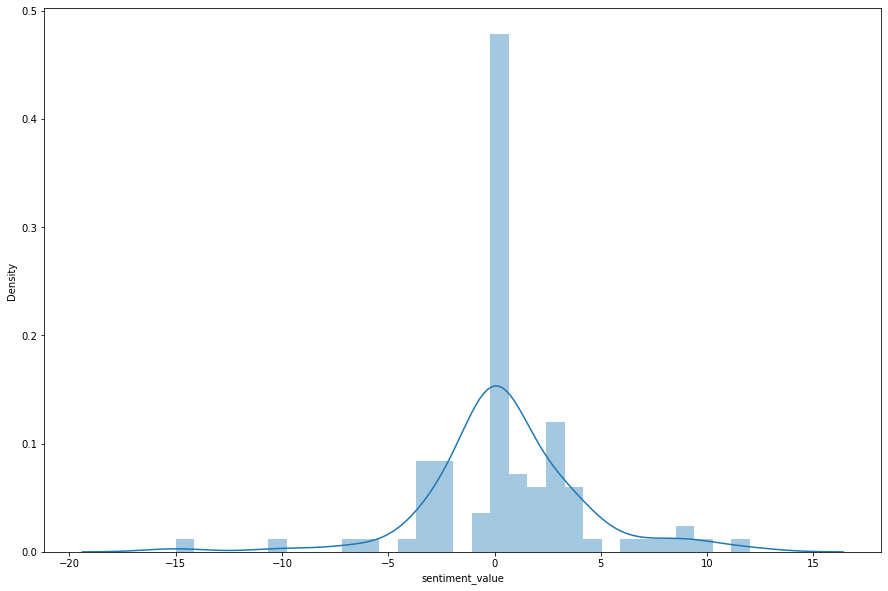

In [71]:
 # Plotting the sentiment value for whole review
import seaborn as sns
plt.figure(figsize=(15,10))
sns.distplot(sent_df['sentiment_value'])

<AxesSubplot:xlabel='index', ylabel='sentiment_value'>

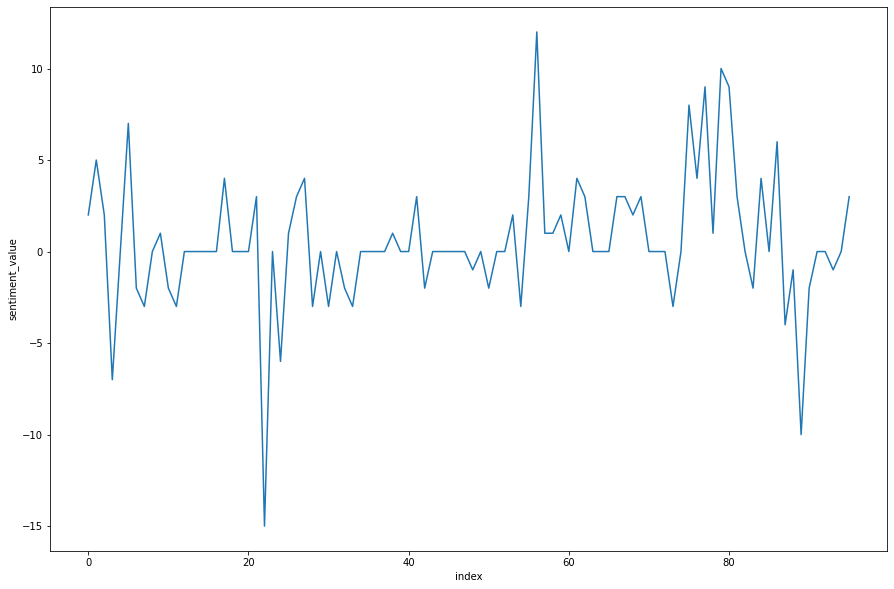

In [73]:
# Plotting the line plot for sentiment value of whole review
plt.figure(figsize=(15,10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)

<AxesSubplot:title={'center':'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment_value'>

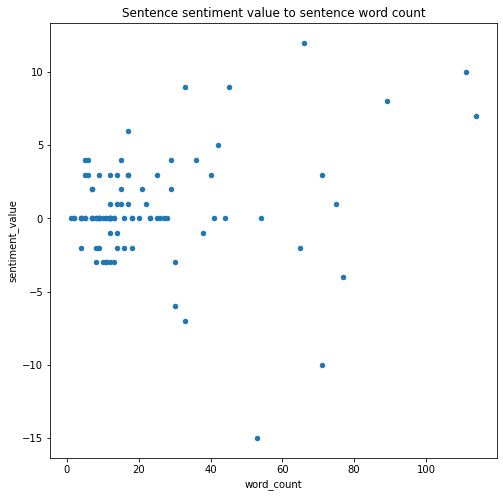

In [72]:
# Correlation analysis
sent_df.plot.scatter(x='word_count',y='sentiment_value',figsize=(8,8),title='Sentence sentiment value to sentence word count')